# Chessboard/Checkeredboard Ordering

Consider the Poisson equation $-\nabla u = f$ on the unit square with Dirichlet boundary conditions. Use a uniform Cartesian grid with grid size $h = 1/(N + 1)$ and the five-point stencil
to approximate the Laplacian, as described in Ex. 2.1.
The resulting linear system for the interior grid points (boundary points are shifted to the right
hand side) has $N^2$ unknowns and the $N^2 × N^2$ matrix is sparse and depends on the ordering
of the grid points.
If $N$ is even, the chessboard ordering yields the matrix equation
$$
\begin{pmatrix}
D & H \\
H^T & D 
\end{pmatrix}
\begin{pmatrix}
u_{white}  \\
u_{black}
\end{pmatrix} = \dots
$$
where $D$ is a diagonal matrix of dimension $N^2/2$ . Determine the structure of the matrix $H$.


## Structure of the column ordering(y-direction)
$$
u_{00}=g_{00}\\
\cdots\\
u_{n0}=g_{n0}\\
u_{01}=g_{01}\\
u_{11}=\frac{u_{01}+u_{10}-4u_{11}+u_{21}+u_{12}}{h^2}\\
u_{21}=\frac{u_{11}+u_{20}-4u_{21}+u_{31}+u_{22}}{h^2}\\
\cdots\\
u_{21}=\frac{u_{11}+u_{20}-4u_{21}+u_{31}+u_{22}}{h^2}\\
u_{0n}=g_{0n}\\
\cdots\\
u_{nn}=g_{nn}
$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.sparse import dia_matrix
import scipy.sparse
import scipy.sparse.linalg

#grid
n=4
h=1/n
#x=np.linspace(0.0, 1.0,n)
#y=np.linspace(0.0, 1.0,n)
x= np.arange(1,n)*h
y= np.arange(1,n)*h
#x= np.arange(1,n-1)*h
#y= np.arange(1,n-1)*h

[Y,X]=np.meshgrid(x,y)
print([X,Y])

[array([[0.25, 0.25, 0.25],
       [0.5 , 0.5 , 0.5 ],
       [0.75, 0.75, 0.75]]), array([[0.25, 0.5 , 0.75],
       [0.25, 0.5 , 0.75],
       [0.25, 0.5 , 0.75]])]


As you will notice the variables in mesh grid has been switched. This is to match our convention that the $X$ matrix corrosponds to first or the row index and the $Y$ index corrosponds to the second index that is the column index. You can visualize the meshes $X,Y$ as matrices holding one of the cordinates of the $2d (x,y)$ plane. lets visualize this with an example.

If we take say (1,0) element of both matrices X,Y it gives us 

## Creating the $L_h$ matrix: 

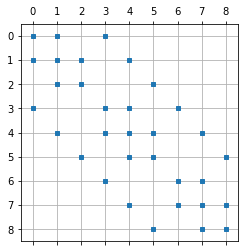

In [17]:
#diagonal_block
db= -4/(h**2)*np.identity(n-1)
db=db+np.diag(np.ones(n-2),1)/h**2
db=db+np.diag(np.ones(n-2),-1)/h**2
L=np.kron(np.identity(n-1),db)
L=L+np.diag(np.ones((n-2)*(n-1)),n-1)
L=L+np.diag(np.ones((n-2)*(n-1)),-n+1)
#print(L)
plt.spy(L,markersize=4)
plt.grid('on')

In [3]:
def fa(x,y):
    return np.sin(x)*np.cos(y)

%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
F=fa(X,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, F, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Function $f(x,y)$')

plt.show()

In [4]:
#print(F,'\n\n')
f=np.reshape(F, ((n-1)**2, 1))

#print(fa(x[0],y[0]))
#print(f)

#numerical Solution
u = np.linalg.solve(L, f)
U = np.reshape(u, ((n-1),(n-1)))
#print(u,'\n\n',U)

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, U, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Numerical solution')
plt.show()

In [6]:
def ua(x,y):
    return -np.sin(x)*np.cos(y)/2.0

Ua=ua(X,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Ua, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Analytic solution')
plt.show()

## Error analysis

In [7]:
err = np.linalg.norm(Ua-U)
print(err)

0.6193024050995996
